<a href="https://colab.research.google.com/github/Nicoflyy/Sistemas-Dinamicos-y-de-control/blob/main/Ejercicios_Codigo/Balance_System_Ejemplo_7_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 3.2 MB/s eta 0:00:00


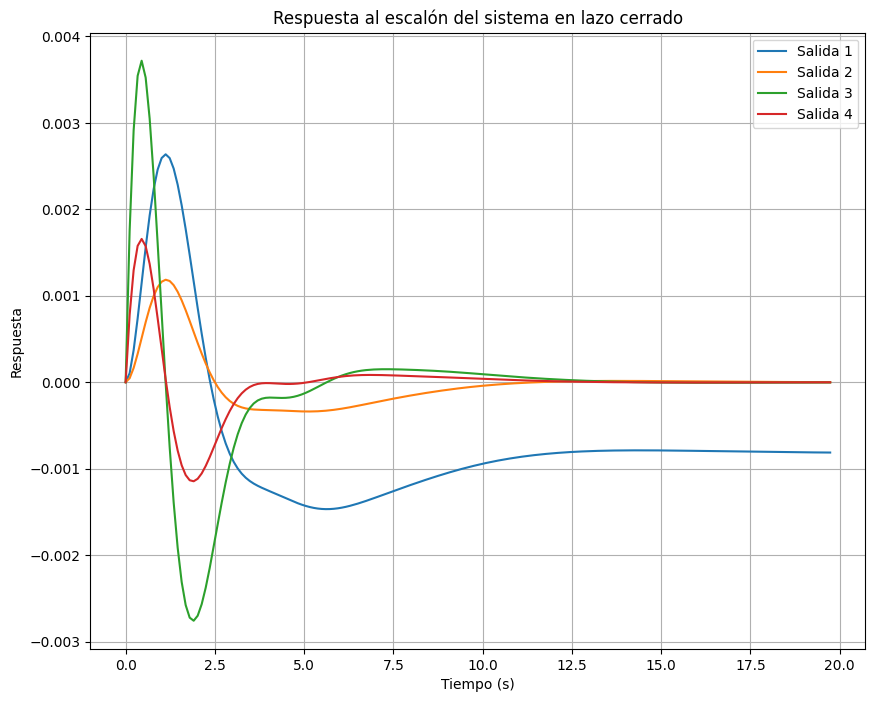

Ganancia de feedforward: kf = [[-1225.]]


In [2]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Parámetros del sistema
M = 10  # kg
m = 80  # kg
c = 0.1  # N s/m
J = 100  # kg m^2/s^2
l = 1  # m
g = 9.8  # m/s^2
gamma = 0.01  # N m s

# Parámetros adicionales
Mt = M + m
Jt = J + m * l**2
mu = Mt * Jt - m**2 * l**2

# Matriz A
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, (m * l**2 * g) / mu, -c * Jt / mu, -gamma * l * m / mu],
    [0, (Mt * g * l) / mu, -c * l * m / mu, -gamma * Mt / mu]
])

# Matriz B
B = np.array([
    [0],
    [0],
    [Jt / mu],
    [l * m / mu]
])

# Eigenvalores deseados
desired_eigenvalues = [-1 + 2j, -1 - 2j, -0.35 + 0.35j, -0.35 - 0.35j]

# Diseño del controlador por realimentación de estados
K = ctrl.place(A, B, desired_eigenvalues)

# Sistema en lazo cerrado
A_cl = A - B @ K

# Simulación de la respuesta al escalón
C = np.eye(4)  # Definiendo la matriz de salida como identidad
D = np.zeros((4, 1))  # Matriz D de ceros

sys_cl = ctrl.ss(A_cl, B, C, D)
T, yout = ctrl.step_response(sys_cl)

# Graficar la respuesta
plt.figure(figsize=(10, 8))
for i in range(4):
    # Squeezing the yout array to remove the extra dimension
    plt.plot(T, yout.squeeze()[i, :], label=f'Salida {i+1}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.legend()
plt.grid(True)
plt.show()

# Ganancia de feedforward
C_ff = np.array([[1, 0, 0, 0]])  # Ejemplo de matriz C para feedforward, modificar si es necesario
kf = -1 / (C_ff @ np.linalg.inv(A - B @ K) @ B)
print(f"Ganancia de feedforward: kf = {kf}")